In [96]:
import torch
from torch_geometric.utils import to_undirected, to_networkx
from torch_geometric.data import Data
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('signs_en.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Landmark 0 x,Landmark 0 y,Landmark 1 x,Landmark 1 y,Landmark 2 x,Landmark 2 y,Landmark 3 x,...,Landmark 16 y,Landmark 17 x,Landmark 17 y,Landmark 18 x,Landmark 18 y,Landmark 19 x,Landmark 19 y,Landmark 20 x,Landmark 20 y,Label
0,415,415,86.0,0,0,0.326569,0.674404,0.357834,0.703072,0.375689,...,0.606782,0.336321,0.575292,0.347091,0.577000,0.336864,0.592053,0.330558,0.594813,not good
1,2927,588,NaN,0,0,0.456985,0.661305,0.467504,0.639797,0.480497,...,0.629676,0.457430,0.617761,0.481457,0.615641,0.491817,0.621171,0.497802,0.628334,c
2,3194,855,NaN,0,0,0.431389,0.722176,0.459923,0.701749,0.483064,...,0.582822,0.423682,0.622943,0.434341,0.581182,0.455356,0.578791,0.470810,0.590627,c
3,298,298,298.0,0,0,0.378981,0.597129,0.397010,0.543736,0.398701,...,0.610331,0.440011,0.626854,0.469402,0.634171,0.454586,0.641440,0.438621,0.639632,good
4,1874,634,NaN,0,0,0.443326,0.806144,0.465649,0.758831,0.444961,...,0.541464,0.397769,0.688573,0.404561,0.640295,0.408814,0.610057,0.412891,0.581599,b


In [99]:
df = df.drop(columns=['Unnamed: 0', "Unnamed: 0.1", "Unnamed: 0.2"])
df

,Landmark 0 x,Landmark 0 y,Landmark 1 x,Landmark 1 y,Landmark 2 x,Landmark 2 y,Landmark 3 x,Landmark 3 y,Landmark 4 x,Landmark 4 y,...,Landmark 16 y,Landmark 17 x,Landmark 17 y,Landmark 18 x,Landmark 18 y,Landmark 19 x,Landmark 19 y,Landmark 20 x,Landmark 20 y,Label
0,0,0,0.326569,0.674404,0.357834,0.703072,0.375689,0.741255,0.382552,0.776034,...,0.606782,0.336321,0.575292,0.347091,0.577000,0.336864,0.592053,0.330558,0.594813,not good
1,0,0,0.456985,0.661305,0.467504,0.639797,0.480497,0.630084,0.492144,0.625483,...,0.629676,0.457430,0.617761,0.481457,0.615641,0.491817,0.621171,0.497802,0.628334,c
2,0,0,0.431389,0.722176,0.459923,0.701749,0.483064,0.689345,0.492661,0.675986,...,0.582822,0.423682,0.622943,0.434341,0.581182,0.455356,0.578791,0.470810,0.590627,c
3,0,0,0.378981,0.597129,0.397010,0.543736,0.398701,0.502422,0.384802,0.473080,...,0.610331,0.440011,0.626854,0.469402,0.634171,0.454586,0.641440,0.438621,0.639632,good
4,0,0,0.443326,0.806144,0.465649,0.758831,0.444961,0.711449,0.419999,0.689627,...,0.541464,0.397769,0.688573,0.404561,0.640295,0.408814,0.610057,0.412891,0.581599,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,0,0,0.596921,0.530045,0.631598,0.498495,0.661079,0.479099,0.681729,0.459185,...,0.242847,0.543579,0.408049,0.523677,0.356601,0.518557,0.320304,0.520988,0.286979,okay
3640,0,0,0.477490,0.761857,0.487965,0.701985,0.475183,0.664504,0.452093,0.646604,...,0.519576,0.429802,0.687781,0.424427,0.637993,0.421233,0.602052,0.418133,0.571011,b
3641,0,0,0.420306,0.683067,0.448311,0.655767,0.470119,0.637198,0.484062,0.623203,...,0.446769,0.366416,0.583441,0.347066,0.544366,0.340043,0.517383,0.338997,0.494371,okay
3642,0,0,0.486522,0.728096,0.510955,0.728275,0.533596,0.729062,0.551506,0.729555,...,0.618555,0.498039,0.625736,0.518070,0.607025,0.538446,0.610092,0.552372,0.624020,c


In [121]:
# get one sample graph
sample = df[df["Label"] == "b"].iloc[1]
sample_x = sample.drop("Label").to_numpy().astype(np.float64).reshape(21, 2)
sample_x = torch.tensor(sample_x, dtype=torch.float)
sample_x

tensor([[0.0000, 0.0000],
        [0.4613, 0.8077],
        [0.4863, 0.7655],
        [0.4715, 0.7195],
        [0.4500, 0.6937],
        [0.5025, 0.6969],
        [0.5196, 0.6438],
        [0.5289, 0.6077],
        [0.5352, 0.5767],
        [0.4801, 0.6826],
        [0.4997, 0.6219],
        [0.5108, 0.5838],
        [0.5211, 0.5473],
        [0.4565, 0.6812],
        [0.4735, 0.6235],
        [0.4856, 0.5894],
        [0.4959, 0.5587],
        [0.4297, 0.6899],
        [0.4408, 0.6457],
        [0.4473, 0.6195],
        [0.4535, 0.5939]])

In [122]:
# make edge index
edge_index = torch.tensor([
    [0, 0, 0, 1, 2, 3, 5, 5, 6, 7, 9, 9, 10, 11, 13, 13, 14, 15, 17, 18, 19],
    [1, 5, 17, 2, 3, 4, 6, 9, 7, 8, 10, 13, 11, 12, 17, 14, 15, 16, 18, 19, 20]
    ], dtype=torch.long)

# make it undirected
edge_index = to_undirected(edge_index)

In [123]:
data = Data(x=sample_x, edge_index=edge_index)

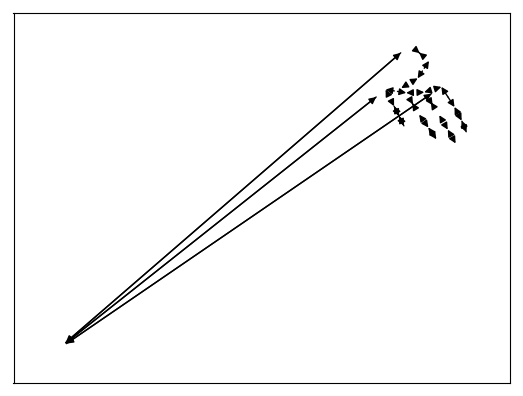

In [128]:
g = to_networkx(data)

for i in range(21):
    g.nodes[i]['pos'] = (sample_x[i][0].item(), sample_x[i][1].item())

nx.draw_networkx_edges(g, pos=nx.get_node_attributes(g, 'pos'))
plt.show()